In [525]:
from IPython.display import clear_output

from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import sys
from polire.interpolate import Kriging
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from matplotlib.animation import FuncAnimation
from matplotlib import rc

from math import sqrt
SPINE_COLOR = 'gray'

In [526]:
fld = str(0)
nsgp = []
gp = []
rf = []
gt = []
for f in [str(i).zfill(5) for i in range(1)]:
    try:
        nsgp.append(np.load('../production/pm25_beijing_best36/linear/data2/results/nsgp_rbf_lsq/fold_'+fld+'/'+f+'.npz')['arr_0'])
        gp.append(np.load('../production/pm25_beijing_best36/linear/data2/results/gp_rbf_gpy/fold_'+fld+'/'+f+'.npz')['arr_0'])
        rf.append(np.load('../production/pm25_beijing_best36/linear/data2/results/rf/fold_'+fld+'/'+f+'.npz')['arr_0'])
        gt.append(np.load('../production/pm25_beijing_best36/linear/data2/fold_'+fld+'/test/y/'+f+'.npz')['arr_0'])
    except:
        pass
print('nsgp', np.sqrt(np.mean(np.square(np.array(nsgp)[:,:,0] - np.array(gt)[:,:,0]), axis=0)))
print('gp', np.sqrt(np.mean(np.square(np.array(gp)[:,:,0] - np.array(gt)[:,:,0]), axis=0)))
print('rf', np.sqrt(np.mean(np.square(np.array(rf)[:,:] - np.array(gt)[:,:,0]), axis=0)))

nsgp [ 1.7867714  15.75583128 28.95541377 15.62498384 24.70965052 63.15525335]
gp [ 2.41472188  3.87155091  4.38337312  6.3851662  11.34766202 60.69063237]
rf [ 2.60095599 10.333806   20.10874595  1.79035918 36.81375454 45.97974123]


(0.0, 300.0)

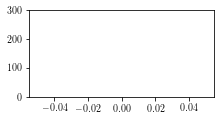

In [527]:
# plt.plot(np.array(gp));
plt.plot(np.array(nsgp)[:,5,0]);
plt.ylim(0,300)

In [528]:
from scipy.io import savemat

In [529]:
savemat('tmp.mat', {"X":np.load('../production/pm25_beijing_best36/linear/data2/fold_0/train/X/00000.npz')['arr_0'], 
         'y':np.load('../production/pm25_beijing_best36/linear/data2/fold_0/train/y/00000.npz')['arr_0'],
         'Xt':np.load('../production/pm25_beijing_best36/linear/data2/fold_0/test/X/00000.npz')['arr_0'],
         'yt':np.load('../production/pm25_beijing_best36/linear/data2/fold_0/test/y/00000.npz')['arr_0']})
scaler = pd.read_pickle('../production/pm25_beijing_best36/linear/data2/fold_0/scaler/00000.pickle')

In [530]:
fld = str(0)
f = str(0).zfill(5)
scaler.transform(np.load('../production/pm25_beijing_best36/linear/data2/results/gp_rbf_gpy/fold_'+fld+'/'+f+'.npz')['arr_0']),\
scaler.transform(np.load('../production/pm25_beijing_best36/linear/data2/results/nsgp_rbf/fold_'+fld+'/'+f+'.npz')['arr_0'])

(array([[1.10666045],
        [1.3676212 ],
        [0.50537175],
        [0.38797112],
        [0.2044866 ],
        [0.84099302]]),
 array([[1.05552712],
        [1.44921537],
        [0.76812407],
        [0.57279525],
        [0.8973294 ],
        [0.85678217]]))

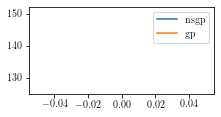

In [531]:
plt.plot(np.array(nsgp)[:,2,0], label='nsgp')
plt.plot(np.array(gp)[:,2,0], label='gp')
plt.legend();

In [533]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 10, # fontsize for x and y labels (was 10)
              'axes.titlesize': 10,
              'font.size': 10, # was 10
              'legend.fontsize': 10, # was 10
              'xtick.labelsize': 10,
              'ytick.labelsize': 10,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)

def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

## Functions

In [534]:
def load_test():
    test_df = pd.DataFrame(columns=test_stations)
    for fold_id, fold in enumerate(folds):
        for file_id, file in enumerate(f_ids):
            test_df.loc[file_id, test_stations[fold_id*len(folds):(fold_id+1)*len(folds)]] =\
            np.load(path+d_name+'/fold_'+fold+'/test/y/'+file+'.npz')['arr_0'].ravel()
    return test_df

def load_results(model_name): # n_test = number of test stations
    pred_df = pd.DataFrame(columns=test_stations)
    for fold_id, fold in enumerate(folds):
        for file_id, file in enumerate(f_ids):
            try:
                val = np.load(path+d_name+'/results/'+model_name+'/fold_'+fold+'/'+file+'.npz')['arr_0'].ravel()
            except Exception as e:
                val = np.nan
                print(model_name,fold_id,file,'not found')
            pred_df.loc[file_id, test_stations[fold_id*len(folds):(fold_id+1)*len(folds)]] = val
    return pred_df

# Global config

In [535]:
path = '../production/pm25_beijing_best36/linear/'
f_ids = [str(i).zfill(5) for i in range(277)]
folds = [str(i) for i in range(6)]
n_test = 6
n_total = 36

## Visualize location of a station

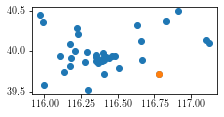

In [536]:
see = 1034

station_df = pd.read_csv('../raw_data/Air20Quality20Data/Beijing/Station.txt').set_index('station_id')
all_locs = station_df[['longtitude', 'latitude']].values
plt.scatter(all_locs[:,0], all_locs[:,1]);
plt.scatter(all_locs[see-1001, 0], all_locs[see-1001, 1]);

### Interpolate empirical covariance matrix

In [537]:
from sklearn.covariance import EmpiricalCovariance

In [538]:
linear_df = pd.read_pickle('../production/pm25_beijing_best36/linear/linear_df.pickle')

cov_df = pd.crosstab(linear_df.index, linear_df.station_id, linear_df.PM25_AQI_value, aggfunc=lambda x:x)
cov_m = EmpiricalCovariance()
cov_m.fit(cov_df.values)

# emp_cov = cov_df.cov().values
emp_cov = cov_m.covariance_

intr = Kriging(variogram_model='gaussian')
N = 36
x1 = np.linspace(station_df['longtitude'].min()-0.1, station_df['longtitude'].max()+0.1, N)
x2 = np.linspace(station_df['latitude'].min()-0.1, station_df['latitude'].max()+0.1, N)

X1, X2 = np.meshgrid(x1, x2)
X_test = np.array([(i, j) for i, j in zip(X1.ravel(), X2.ravel())])
X_train = station_df[['longtitude', 'latitude']].values
print(X_test.shape, X_train.shape)

s_i = 35
intr.fit(X_train, emp_cov[:,s_i])
y_pred = intr.predict(X_test).reshape(N, N)

(1296, 2) (36, 2)


 /home/patel_zeel/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


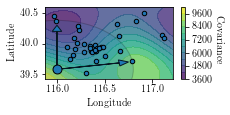

In [557]:
latexify(3.32, 1.7);

# file = gpd.read_file('../production/pm25_beijing_best36/linear/imgs/roads.shp')
# file.plot(color='k',ax=plt.gca(),zorder=-1,alpha=0.4)

ac = plt.Circle((all_locs[s_i,0], all_locs[s_i, 1]), 0.8, edgecolor='k', alpha=0.2)
plt.arrow(all_locs[s_i,0], all_locs[s_i,1], 0.75,0.12, length_includes_head=True, head_width=0.1, head_length=.1)
plt.arrow(all_locs[s_i,0], all_locs[s_i,1], 0, 0.72, length_includes_head=True, head_width=0.1, head_length=.1)
plt.gca().add_artist(ac);
plt.scatter(all_locs[:, 0], all_locs[:, 1], s=20, c='tab:blue', edgecolor='k', zorder=10)
plt.scatter(all_locs[s_i, 0], all_locs[s_i, 1], s=80, c='tab:blue', edgecolors='k', zorder=10)
plt.contourf(X1, X2, y_pred, alpha=0.8, levels=10);
plt.xlabel('Longitude');plt.ylabel('Latitude');
plt.text(117.65,39.7,'Covariance', rotation=-90)
plt.colorbar();
plt.tight_layout();
plt.savefig('../production/pm25_beijing_best36/linear/imgs/emp_cov_36.pdf')

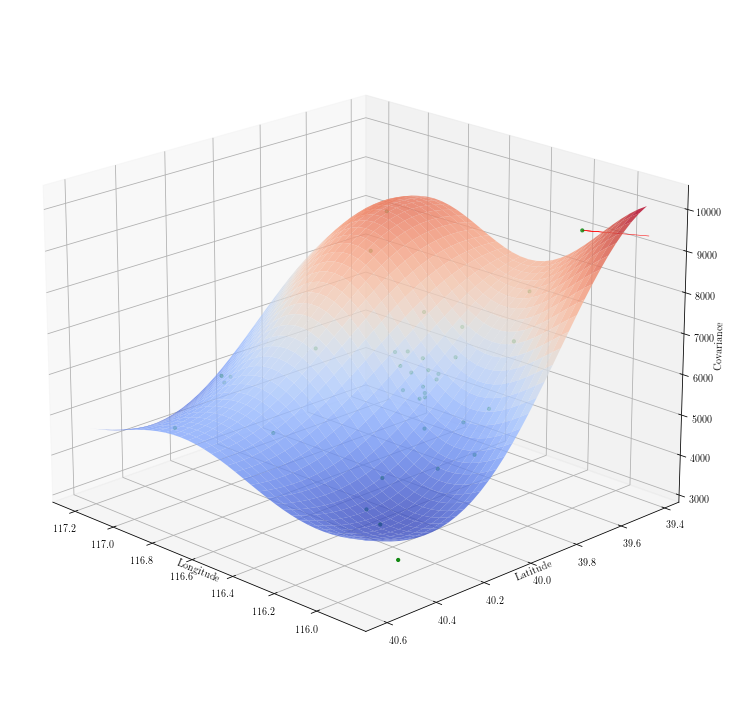

In [305]:
latexify(3.32, 2)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, y_pred, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none', alpha=.8)
ax.view_init(20, 135)

ax.scatter(all_locs[:,0], all_locs[:,1], emp_cov[s_i, :], s=10, c='g')

ax.quiver(
        all_locs[s_i,0], all_locs[s_i,1], emp_cov[s_i, s_i], # <-- starting point of vector
        0.2, 0.1, 0.1, # <-- directions of vector
        color = 'red', lw = 0.5,  arrow_length_ratio=0.3, pivot='tip'
    )

ax.set_xlabel('Longitude', labelpad=-16)
ax.set_ylabel('Latitude', labelpad=-16)
ax.set_zlabel('Covariance', labelpad=-0.1);
# def update(i):
#     ax.view_init(20, 135+i*20)

# anim = FuncAnimation(fig, update, range(18))
# rc('animation', html='jshtml')
# plt.close()
# anim
fig.tight_layout();
# plt.savefig('../production/pm25_beijing_best36/linear/imgs/emp_cov_36.pdf')

### Fit full models

In [306]:
data_df = pd.read_pickle('../processed_data/best36_beijing_pm25.pickle').sort_values(['time', 'station_id'])

test_df = pd.crosstab(data_df.index, data_df.station_id, data_df.PM25_AQI_value, aggfunc=lambda x:x)

In [307]:
from NSGPy.NumPy import LLS
from GPy.kern import RBF
from GPy.models import GPRegression
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
sy = StandardScaler()

t = 50
X = data_df.loc[data_df.index.unique()[t]][['longitude', 'latitude']].values
y = data_df.loc[data_df.index.unique()[t]]['PM25_AQI_value'].values.reshape(-1,1)

nsgp = LLS(X.shape[1], N_l_bar=3, optimizer='lsq')
gp = GPRegression(s.fit_transform(X), sy.fit_transform(y), RBF(X.shape[1]), normalizer=False)

nsgp.fit(s.fit_transform(X), sy.fit_transform(y), n_restarts=5, cov=cov_m.covariance_)

In [308]:
nsgp.params

{'likelihood (mll)': 1413952.9596096869,
 'GP_variance (sigma_f)': array([95.93726852]),
 'GP_noise_level (sigma_n)': array([9.74339695]),
 'L_GP_variance (sigma_f_bar)': array([1.09872291, 1.09973251]),
 'L_GP_lengthscale (sigma_l_bar)': array([2.89278205, 3.12013935]),
 'L_GP_noise_level (sigma_n_bar)': array([0.28862103, 0.09476213]),
 'N_lengthscales (l_bar)': array([[ 7.54395811, 14.55389134],
        [11.06230721, 10.60036113],
        [16.88727801, 29.83634383]])}

In [309]:
gp.optimize_restarts(5)

Optimization restart 1/5, f = 40.19713865642157
Optimization restart 2/5, f = 40.1971386564194
Optimization restart 3/5, f = 40.197138656419014
Optimization restart 4/5, f = 40.19713865646651
Optimization restart 5/5, f = 40.19713865644028


 /home/patel_zeel/anaconda3/lib/python3.8/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f84abaa5880>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7f84abad1970>]}

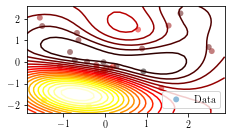

In [310]:
gp.plot()

In [311]:
gp_pred, gp_var = gp.predict(s.transform(X_test))
gp_pred = gp_pred.reshape(36, 36)
gp_var = gp_var.reshape(36, 36)

In [312]:
nsgp_pred, nsgp_var = nsgp.predict(s.transform(X_test))
nsgp_pred = sy.inverse_transform(nsgp_pred).reshape(36, 36)
nsgp_var = np.var(y)*nsgp_var.reshape(36, 36)

In [313]:
gp_pred.shape

(36, 36)

In [314]:
print('gp rmse', mean_squared_error(y, sy.inverse_transform(gp.predict(s.transform(X))[0]), squared=False))
print('nsgp rmse', mean_squared_error(y, sy.inverse_transform(nsgp.predict(s.transform(X))[0]), squared=False))

gp rmse 5.868855406123968
nsgp rmse 9.074842079670166


 /home/patel_zeel/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


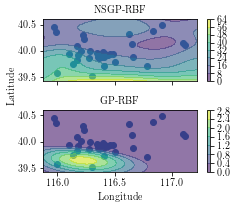

In [315]:
latexify(3.32,3)
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
ax = ax.ravel()

ax[0].scatter(all_locs[:,0], all_locs[:,1])#, c=y, edgecolor='k')
mp = ax[0].contourf(X1, X2, np.clip(nsgp_pred, 0, np.inf), alpha=0.6);
fig.colorbar(mp, ax=ax[0])
ax[0].set_title('NSGP-RBF')

ax[1].scatter(all_locs[:,0], all_locs[:,1])#, c=y, edgecolor='k')
mp = ax[1].contourf(X1, X2, np.clip(gp_pred, 0, np.inf), alpha=0.6);
fig.colorbar(mp, ax=ax[1])
ax[1].set_title('GP-RBF')
ax[1].set_xlabel('Longitude');fig.text(0,0.5, 'Latitude', rotation=90);
fig.tight_layout()
fig.savefig('../production/pm25_beijing_best36/linear/imgs/gpvsnsgp.pdf')

In [316]:
from sklearn.covariance import EmpiricalCovariance

In [317]:
l = nsgp.predict_lengthscales_(X)
nsgp.K_XX = nsgp.K_(X, l)
emp_cov = nsgp.K_XX

intr = Kriging(variogram_model='gaussian')
N = 36
x1 = np.linspace(station_df['longtitude'].min()-0.1, station_df['longtitude'].max()+0.1, N)
x2 = np.linspace(station_df['latitude'].min()-0.1, station_df['latitude'].max()+0.1, N)

X1, X2 = np.meshgrid(x1, x2)
X_test = np.array([(i, j) for i, j in zip(X1.ravel(), X2.ravel())])
X_train = station_df[['longtitude', 'latitude']].values
print(X_test.shape, X_train.shape)

s_i = 35
intr.fit(X_train, emp_cov[:,s_i])
y_pred = intr.predict(X_test).reshape(N, N)

(1296, 2) (36, 2)


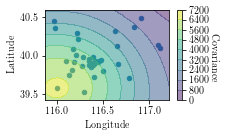

In [318]:
latexify(3.32, 2);

# file = gpd.read_file('../production/pm25_beijing_best36/linear/imgs/roads.shp')
# file.plot(color='k',ax=plt.gca(),zorder=-1,alpha=0.4)

# ac = plt.Circle((all_locs[s_i,0], all_locs[s_i, 1]), 0.8, edgecolor='k', alpha=0.2)
# plt.arrow(all_locs[s_i,0], all_locs[s_i,1], 0.75,0.12, length_includes_head=True, head_width=0.1, head_length=.1)
# plt.arrow(all_locs[s_i,0], all_locs[s_i,1], 0, 0.72, length_includes_head=True, head_width=0.1, head_length=.1)
# plt.gca().add_artist(ac);
plt.scatter(all_locs[:, 0], all_locs[:, 1], s=20)
# plt.scatter(all_locs[s_i, 0], all_locs[s_i, 1], s=80, c='b')
plt.contourf(X1, X2, y_pred, alpha=0.5);
plt.xlabel('Longitude');plt.ylabel('Latitude');
plt.text(117.65,39.7,'Covariance', rotation=-90)
plt.colorbar();
plt.tight_layout();
# plt.savefig('../production/pm25_beijing_best36/linear/imgs/emp_cov_36.pdf')

In [319]:
emp_cov = gp.kern.K(X)

intr = Kriging(variogram_model='gaussian')
N = 36
x1 = np.linspace(station_df['longtitude'].min()-0.1, station_df['longtitude'].max()+0.1, N)
x2 = np.linspace(station_df['latitude'].min()-0.1, station_df['latitude'].max()+0.1, N)

X1, X2 = np.meshgrid(x1, x2)
X_test = np.array([(i, j) for i, j in zip(X1.ravel(), X2.ravel())])
X_train = station_df[['longtitude', 'latitude']].values
print(X_test.shape, X_train.shape)

s_i = 35
intr.fit(X_train, emp_cov[:,s_i])
y_pred = intr.predict(X_test).reshape(N, N)

(1296, 2) (36, 2)


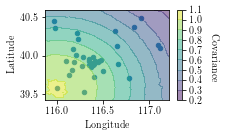

In [320]:
latexify(3.32, 2);

# file = gpd.read_file('../production/pm25_beijing_best36/linear/imgs/roads.shp')
# file.plot(color='k',ax=plt.gca(),zorder=-1,alpha=0.4)

# ac = plt.Circle((all_locs[s_i,0], all_locs[s_i, 1]), 0.8, edgecolor='k', alpha=0.2)
# plt.arrow(all_locs[s_i,0], all_locs[s_i,1], 0.75,0.12, length_includes_head=True, head_width=0.1, head_length=.1)
# plt.arrow(all_locs[s_i,0], all_locs[s_i,1], 0, 0.72, length_includes_head=True, head_width=0.1, head_length=.1)
# plt.gca().add_artist(ac);
plt.scatter(all_locs[:, 0], all_locs[:, 1], s=20)
# plt.scatter(all_locs[s_i, 0], all_locs[s_i, 1], s=80, c='b')
plt.contourf(X1, X2, y_pred, alpha=0.5);
plt.xlabel('Longitude');plt.ylabel('Latitude');
plt.text(117.65,39.7,'Covariance', rotation=-90)
plt.colorbar();
plt.tight_layout();
# plt.savefig('../production/pm25_beijing_best36/linear/imgs/emp_cov_36.pdf')

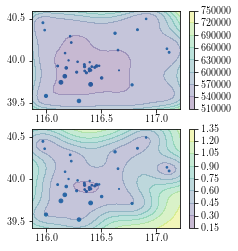

In [321]:
latexify(3.32,4)
fig, ax = plt.subplots(2,1)
ax = ax.ravel()

ax[0].scatter(all_locs[:,0], all_locs[:,1], y/4)
mp = ax[0].contourf(X1, X2, nsgp_var, alpha=0.3);
fig.colorbar(mp, ax=ax[0])

ax[1].scatter(all_locs[:,0], all_locs[:,1], y/4)
mp = ax[1].contourf(X1, X2, gp_var, alpha=0.3);
fig.colorbar(mp, ax=ax[1])

In [322]:
mean_squared_error(y, gp.predict(X)[0], squared=False)

24.0641503763032

In [323]:
mean_squared_error(y, sy.inverse_transform(nsgp.predict(s.transform(X))[0]), squared=False)

9.074842079670166

In [324]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

C = (0.1, 0.5, 1, 5, 10)
kernel = ('linear', 'rbf', 'sigmoid')
param_grid = {'C':C, 'kernel':kernel}
svr = SVR()
cvmodel = GridSearchCV(svr, param_grid, refit=True, cv=5)

cvmodel.fit(s.transform(X), sy.transform(y).ravel())
mean_squared_error(y, sy.inverse_transform(cvmodel.predict(s.transform(X))), squared=False)

9.302380611586711

In [325]:
svr_pred = sy.inverse_transform(cvmodel.predict(s.transform(X_test))).reshape(36,36)

 /home/patel_zeel/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


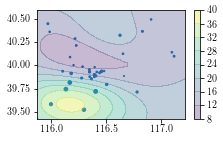

In [326]:
latexify(3.32, 2)
plt.scatter(all_locs[:,0], all_locs[:,1], y/4)
mp = plt.contourf(X1, X2, svr_pred, alpha=0.3);
plt.colorbar(mp);

## For Long, lat

In [483]:
d_name = 'data2' # Data name
test_stations = []
for fold_id, fold in enumerate(folds):
    test_stations.extend(pd.read_pickle(path+d_name+'/fold_'+fold+'/test_stations.pickle'))
print(test_stations)

[1014, 1017, 1027, 1031, 1032, 1036, 1009, 1010, 1013, 1018, 1022, 1035, 1001, 1005, 1006, 1016, 1020, 1030, 1002, 1003, 1004, 1012, 1025, 1034, 1011, 1019, 1023, 1024, 1028, 1033, 1007, 1008, 1015, 1021, 1026, 1029]


### Load ground truth

In [484]:
res_gt = load_test()

### Load different model results in a DataFrame

In [485]:
# res = {model:None for model in ['svr', 'rf', 'elst', 'mlp', 'gp_rbf_gpy', 'gp_m12','nsgp_rbf_lsq', 'nsgp_rbf']}#, 'gp_fi', 
#                             'gp_linear', 'gp_m12', 'nsgp_m12', 'gp_m32', 'dkl', 'nsgp_rbf', 
#                             'nsgp_rbf_lsq', 'gp_combo', 'mlp']}
res = {model:None for model in ['svr', 'rf', 'elst', 'mlp', 'gp_rbf_gpy', 'gp_m12', 'nsgp_rbf']}
for key in res.keys():
#     clear_output(wait=True)
    print('Loading', key)
    res[key] = load_results(key)

Loading svr
Loading rf
Loading elst
Loading mlp
Loading gp_rbf_gpy
Loading gp_m12
Loading nsgp_rbf


### Fold wise RMSE & R2

In [486]:
rmse_df = pd.DataFrame(index=res.keys())
rmse_df.index.name = 'RMSE'
r2_df = pd.DataFrame(index=res.keys())
r2_df.index.name = 'R^2'
for key in res:
    if key not in ['']:
        clear_output(wait=True)
        print(key)
        for f_id in range(len(folds)):
            tmp_pred = res[key].iloc[:,f_id*len(folds):(f_id+1)*len(folds)].fillna(method='ffill').values
            tmp_test = res_gt.iloc[:,f_id*len(folds):(f_id+1)*len(folds)].values

            rmse_df.loc[key, f_id] = mean_squared_error(tmp_test.ravel(), tmp_pred.ravel(), squared=False)
            r2_df.loc[key, f_id] = r2_score(tmp_test.ravel(), tmp_pred.ravel())
        rmse_df.loc[key, 'Average'] = rmse_df.loc[key].mean()
        r2_df.loc[key, 'Average'] = r2_df.loc[key].mean()
print(rmse_df.to_markdown())
print()
print(r2_df.to_markdown())

nsgp_rbf
| RMSE       |       0 |       1 |       2 |       3 |       4 |       5 |   Average |
|:-----------|--------:|--------:|--------:|--------:|--------:|--------:|----------:|
| svr        | 41.9506 | 26.6279 | 28.9802 | 34.0562 | 30.3545 | 25.1556 |   31.1875 |
| rf         | 37.7475 | 25.0327 | 28.5119 | 33.9487 | 28.6126 | 22.768  |   29.4369 |
| elst       | 42.7145 | 30.8063 | 29.4979 | 35.8637 | 30.8736 | 27.0947 |   32.8084 |
| mlp        | 47.1031 | 30.9303 | 33.4071 | 40.7412 | 30.8159 | 28.568  |   35.2609 |
| gp_rbf_gpy | 42.0865 | 26.9805 | 31.3042 | 36.1174 | 28.9685 | 21.5225 |   31.1632 |
| gp_m12     | 40.5281 | 25.7021 | 29.6133 | 35.6225 | 27.6098 | 21.7113 |   30.1312 |
| nsgp_rbf   | 48.1332 | 28.362  | 31.1292 | 38.9484 | 33.7177 | 25.1317 |   34.237  |

| R^2        |        0 |        1 |        2 |        3 |        4 |        5 |   Average |
|:-----------|---------:|---------:|---------:|---------:|---------:|---------:|----------:|
| svr        | 0.7634

In [487]:
print(rmse_df[['Average']].round(2).drop(['gp_fi','dt', 'dkl', 'nsgp_rbf_lsq', 'gp_combo'], axis=0).to_latex())

KeyError: "['gp_fi' 'dt' 'dkl' 'nsgp_rbf_lsq' 'gp_combo'] not found in axis"

### Station-wise RMSE

gp_rbf_gpy


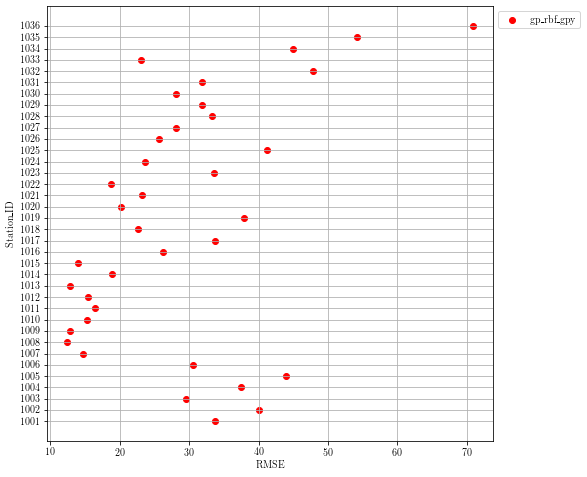

In [488]:
plt.figure(figsize=(8,8))
custom = ['gp_rbf_gpy']
for key in custom:
    if key not in ['gp_combo']:
        clear_output(wait=True)
        print(key)
        if key == 'gp_rbf_gpy':
            plt.scatter(np.sqrt(np.mean(np.square(res[key] - res_gt), axis=0)), res_gt.columns, label=key.replace('_','\\_'), c='r')
        else:
            plt.scatter(np.sqrt(np.mean(np.square(res[key] - res_gt), axis=0)), res_gt.columns, label=key.replace('_','\\_'), alpha=0.3)
plt.legend(bbox_to_anchor=(1,1));
plt.yticks(range(1001,1037))
plt.xlabel('RMSE'); plt.ylabel('Station\_ID')
plt.grid(True);

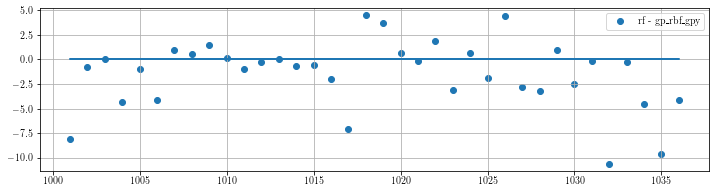

In [489]:
plt.figure(figsize=(12,3))
custom = ['gp_rbf_gpy', 'rf']
c1 = np.sqrt(np.mean(np.square(res[custom[0]] - res_gt)))
c2 = np.sqrt(np.mean(np.square(res[custom[1]] - res_gt)))
plt.plot(c1.index, np.zeros(c1.shape[0]));
diff_df = c2-c1
plt.scatter(diff_df.index, diff_df, label=custom[1].replace('_','\\_')+' - '+custom[0].replace('_','\\_'));
plt.legend(bbox_to_anchor=(1,1));
plt.grid(1);

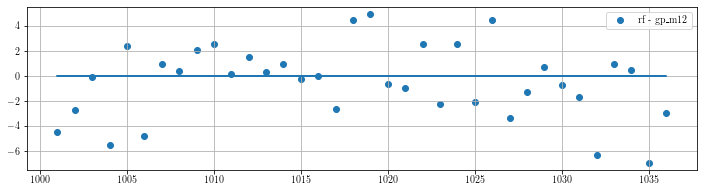

In [490]:
plt.figure(figsize=(12,3))
custom = ['gp_m12', 'rf']
c1 = np.sqrt(np.mean(np.square(res[custom[0]] - res_gt)))
c2 = np.sqrt(np.mean(np.square(res[custom[1]] - res_gt)))
plt.plot(c1.index, np.zeros(c1.shape[0]));
diff_df = c2-c1
plt.scatter(diff_df.index, diff_df, label=custom[1].replace('_','\\_')+' - '+custom[0].replace('_','\\_'));
plt.legend(bbox_to_anchor=(1,1));
plt.grid(1);

### For station 1035, GP is very bad than RF, checking,

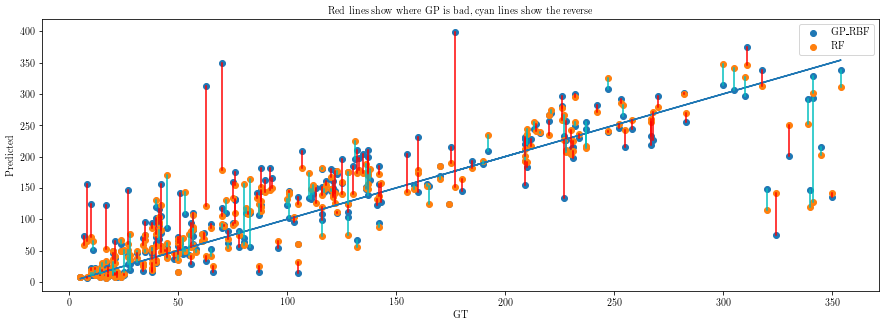

In [491]:
plt.figure(figsize=(15,5))
plt.plot(res_gt[1035], res_gt[1035])
# plt.scatter(res_gt[1035], res['gp_rbf_gpy'][1035], label='GP_RBF');
plt.scatter(res_gt[1035], res['gp_rbf_gpy'][1035], label='GP\_RBF');
plt.scatter(res_gt[1035], res['rf'][1035], label='RF');
c = ['c' if i-j>=0 else 'r' for i,j in zip(np.abs(res_gt[1035]-res['rf'][1035]), np.abs(res_gt[1035]-res['gp_rbf_gpy'][1035]))]
for i in range(res_gt.shape[0]):
    plt.plot([res_gt[1035][i], res_gt[1035][i]], [res['gp_rbf_gpy'][1035][i], res['rf'][1035][i]], c=c[i]);
plt.legend();
plt.xlabel('GT');plt.ylabel('Predicted');
plt.title('Red lines show where GP is bad, cyan lines show the reverse');

In [492]:
np.argmax(np.abs(res['gp_rbf_gpy'][1035] - res['rf'][1035])) # Max difference between two

142

In [493]:
np.argmax(np.abs(res['gp_rbf_gpy'][1035] - res_gt[1035])) # Bad most prediction

143

In [338]:
drop_id = 142
print(np.sqrt(np.square(res_gt[1035] - res['gp_rbf_gpy'][1035]).mean()), np.sqrt(np.square(res_gt[1035] - res['rf'][1035]).mean()))

print(np.sqrt(np.square(res_gt[1035].drop(drop_id, axis=0) - res['gp_rbf_gpy'][1035].drop(drop_id, axis=0)).mean()), 
      np.sqrt(np.square(res_gt[1035] - res['rf'][1035]).mean()))

54.20917404664254 44.62985439974106
52.63137563141193 44.62985439974106


In [339]:
res_gt[1035][drop_id], res['gp_rbf_gpy'][1035][drop_id], res['rf'][1035][drop_id]

(177.0, 399.40670210448707, 151.56105659032045)

array([[ 11.98255859],
       [ 12.00426253],
       [ 11.6999609 ],
       [ 15.35892479],
       [ 11.69585787],
       [129.09214532]])

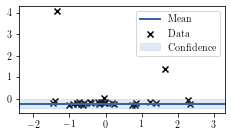

In [340]:
model = pd.read_pickle('../production/pm25_beijing_best36/linear/data2/results/gp_rbf_gpy/fold_1/00'+str(drop_id)+'.model')
# fig, ax = plt.subplots();
model.plot(visible_dims=[0]);

scaler = pd.read_pickle('../production/pm25_beijing_best36/linear/data2/fold_1/scaler/00'+str(drop_id)+'.pickle')
trn_y = np.load('../production/pm25_beijing_best36/linear/data2/fold_1/train/y/00'+str(drop_id)+'.npz')['arr_0']
trn_y_unscaled = scaler.inverse_transform(trn_y)
np.sqrt(model.predict(np.load('../production/pm25_beijing_best36/linear/data2/fold_1/test/X/00'+str(drop_id)+'.npz')['arr_0'])[1]*np.var(trn_y_unscaled))*2

## Average predicted variance per station for gp_rbf

In [494]:
def load_variance(model_name): # n_test = number of test stations
    pred_df = pd.DataFrame(columns=test_stations)
    for fold_id, fold in enumerate(folds):
        for file_id, file in enumerate(f_ids):
            try:
                val = np.load(path+d_name+'/results/'+model_name+'/fold_'+fold+'/'+file+'_var.npz')['arr_0'].ravel()
            except Exception as e:
                val = np.nan
                print(model_name,fold_id,file,'not found')
            pred_df.loc[file_id, test_stations[fold_id*len(folds):(fold_id+1)*len(folds)]] = val
    return pred_df

In [516]:
var_df = load_variance('gp_rbf_gpy').fillna(method='ffill')

 /home/patel_zeel/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


object float64


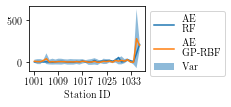

In [524]:
i = 143
latexify(3.32, 1.6)
# plt.figure(figsize=(15,4))
var = var_df.T.sort_index().T.iloc[i].values
err = np.abs(res['gp_rbf_gpy'].T.sort_index().T.iloc[i].values-res_gt.T.sort_index().T.iloc[i].values)
errf = np.abs(res['rf'].T.sort_index().T.iloc[i].values-res_gt.T.sort_index().T.iloc[i].values)
# plt.bar(range(1001,1037), var, label='Var', alpha=0.5);
plt.plot(range(1001,1037), errf, '-', label='AE\nRF');
plt.plot(range(1001,1037), err, '-', label='AE\nGP-RBF');
print(err.dtype, var.dtype)
plt.fill_between(np.arange(1001, 1037), err.astype(np.float32)+var, 
                 err.astype(np.float32)-var, label='Var', alpha=0.5)
plt.legend(bbox_to_anchor=(1,1));
plt.xlabel('Station ID')
plt.xticks(range(1001,1037,8))
# plt.ylabel('')
plt.tight_layout();
plt.savefig('../production/pm25_beijing_best36/linear/imgs/conf.pdf')

## For All features

In [437]:
d_name = 'data10' # Data name
test_stations = []
for fold_id, fold in enumerate(folds):
    test_stations.extend(pd.read_pickle(path+d_name+'/fold_'+fold+'/test_stations.pickle'))
print(test_stations)

[1014, 1017, 1027, 1031, 1032, 1036, 1009, 1010, 1013, 1018, 1022, 1035, 1001, 1005, 1006, 1016, 1020, 1030, 1002, 1003, 1004, 1012, 1025, 1034, 1011, 1019, 1023, 1024, 1028, 1033, 1007, 1008, 1015, 1021, 1026, 1029]


### Load ground truth

In [438]:
res_gt = load_test()

### Load different model results in a DataFrame

In [439]:
# res = {model:None for model in ['svr', 'rf', 'dt', 'elst', 'gp_rbf_gpy', 'nsgp_rbf_extra', 'gp_fi', 
#                             'gp_linear', 'gp_m12', 'gp_m32', 'dkl', 'nsgp_rbf', 'nsgp_rbf_lsq',
#                              'gp_combo', 'mlp']}#'nsgp_rbf_lsq', 'nsgp_m12',
res = {model:None for model in ['rf', 'nsgp_rbf', 'mlp','gp_rbf_gpy','nsgp_rbf_lsq']}
for key in res.keys():
#     clear_output(wait=True)
    print('Loading', key)
    res[key] = load_results(key)

# Correction for an extremely bad prediction
print(res['nsgp_rbf'][1025].iloc[66])
res['nsgp_rbf'][1025].iloc[66] = np.mean(res['nsgp_rbf'][1025])
print(res['nsgp_rbf'][1025].iloc[66])

Loading rf
Loading nsgp_rbf
nsgp_rbf 1 00170 not found
nsgp_rbf 3 00001 not found
nsgp_rbf 5 00021 not found
nsgp_rbf 5 00159 not found
nsgp_rbf 5 00168 not found
Loading mlp
Loading gp_rbf_gpy
Loading nsgp_rbf_lsq
1551.170293705933
94.97217789784507


### Fold wise RMSE & R2

In [440]:
rmse_df = pd.DataFrame(index=res.keys())
rmse_df.index.name = 'RMSE'
r2_df = pd.DataFrame(index=res.keys())
r2_df.index.name = 'R^2'
for key in res:
    if key not in ['nsgp_m12']:
        clear_output(wait=True)
        print(key)
        for f_id in range(len(folds)):
            tmp_pred = res[key].iloc[:,f_id*len(folds):(f_id+1)*len(folds)].fillna(method='ffill').values
            tmp_test = res_gt.iloc[:,f_id*len(folds):(f_id+1)*len(folds)].values
            if np.min(tmp_pred.ravel())<0:
                print('Flag')
            rmse_df.loc[key, f_id] = mean_squared_error(tmp_test.ravel(), np.clip(tmp_pred.ravel(), 0, np.inf), squared=False)
            r2_df.loc[key, f_id] = r2_score(tmp_test.ravel(), tmp_pred.ravel())
        rmse_df.loc[key, 'Average'] = rmse_df.loc[key].mean()
        r2_df.loc[key, 'Average'] = r2_df.loc[key].mean()
print(rmse_df.to_markdown())
print()
print(r2_df.to_markdown())

nsgp_rbf_lsq
Flag
Flag
Flag
Flag
Flag
Flag
| RMSE         |         0 |         1 |         2 |         3 |         4 |         5 |   Average |
|:-------------|----------:|----------:|----------:|----------:|----------:|----------:|----------:|
| rf           |   41.243  |   24.6615 |   29.2593 |   33.7415 |   29.2071 |   23.093  |   30.2009 |
| nsgp_rbf     |   50.0151 |   30.4084 |   32.564  |   40.4943 |   31.242  |   27.6124 |   35.3894 |
| mlp          |   47.569  |   33.5193 |   31.4202 |   36.3256 |   33.0584 |   26.8848 |   34.7962 |
| gp_rbf_gpy   |   43.3824 |   27.9742 |   30.929  |   36.7673 |   29.5068 |   22.5411 |   31.8501 |
| nsgp_rbf_lsq | 5002.56   | 2572.49   | 2010.45   | 1838.28   | 2627.07   | 1728.24   | 2629.85   |

| R^2          |            0 |           1 |            2 |           3 |            4 |           5 |      Average |
|:-------------|-------------:|------------:|-------------:|------------:|-------------:|------------:|-------------:|
| rf       

In [173]:
# final_res_df = rmse_df[['Average']].round(2).loc[['svr', 'rf', 'elst', 'gp_rbf_gpy', 'gp_m12', 'nsgp_rbf', 'mlp']]
# final_res_df = final_res_df.rename(index={'svr':'Support Vector Regression', 'rf':'Random Forest', 
#                                             'gp_rbf_gpy':'GP-RBF', 'gp_m12':'GP-Exponential', 
#                                           'nsgp_rbf':'NSGP-RBF','mlp':'Neural Net', 'elst':'Elastic Net'
#                                            })
# print(final_res_df.to_latex())

### Station-wise RMSE

rf


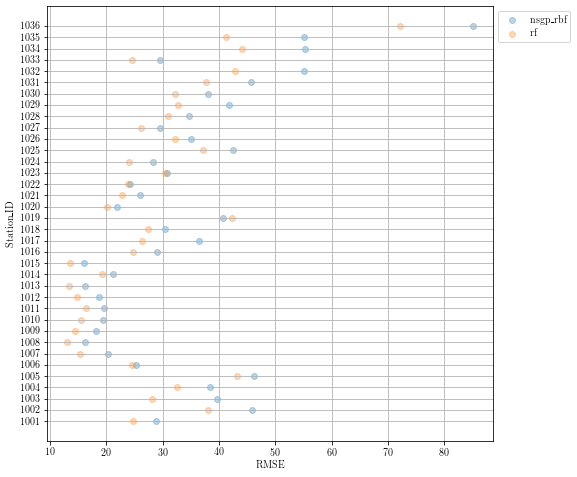

In [174]:
plt.figure(figsize=(8,8))
custom = ['nsgp_rbf', 'rf']
for key in custom:
    if key not in ['gp_combo']:
        clear_output(wait=True)
        print(key)
        if key == 'gp_rbf_gpy':
            plt.scatter(np.sqrt(np.mean(np.square(res[key] - res_gt), axis=0)), res_gt.columns, label=key.replace('_','\\_'), c='r')
        else:
            plt.scatter(np.sqrt(np.mean(np.square(res[key] - res_gt), axis=0)), res_gt.columns, label=key.replace('_','\\_'), alpha=0.3)
plt.legend(bbox_to_anchor=(1,1));
plt.yticks(range(1001,1037))
plt.xlabel('RMSE'); plt.ylabel('Station\_ID')
plt.grid(True);

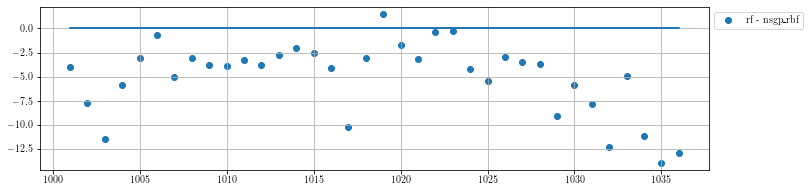

In [175]:
plt.figure(figsize=(12,3))
custom = ['nsgp_rbf', 'rf']
c1 = np.sqrt(np.mean(np.square(res[custom[0]] - res_gt)))
c2 = np.sqrt(np.mean(np.square(res[custom[1]] - res_gt)))
plt.plot(c1.index, np.zeros(c1.shape[0]));
diff_df = c2-c1
plt.scatter(diff_df.index, diff_df, label=custom[1].replace('_','\\_')+' - '+custom[0].replace('_','\\_'));
plt.legend(bbox_to_anchor=(1,1));
plt.grid(1);

### For station 1035, GP is very bad than RF, checking,

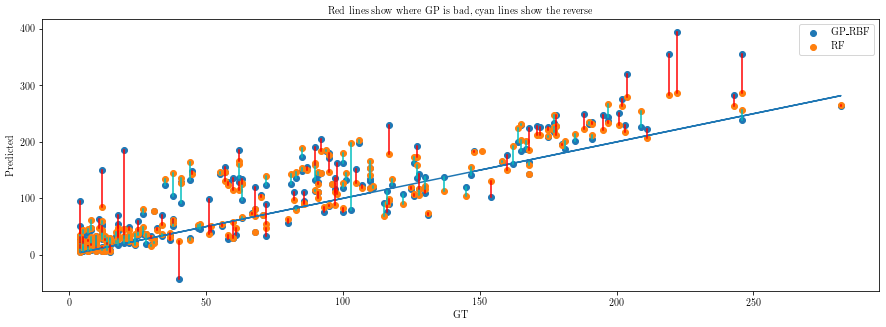

In [176]:
plt.figure(figsize=(15,5))
plt.plot(res_gt[1025], res_gt[1025])
# plt.scatter(res_gt[1025], res['gp_rbf_gpy'][1025], label='GP_RBF');
plt.scatter(res_gt[1025], res['nsgp_rbf'][1025], label='GP\_RBF');
plt.scatter(res_gt[1025], res['rf'][1025], label='RF');
c = ['c' if i-j>=0 else 'r' for i,j in zip(np.abs(res_gt[1025]-res['rf'][1025]), np.abs(res_gt[1025]-res['nsgp_rbf'][1025]))]
for i in range(res_gt.shape[0]):
    plt.plot([res_gt[1025][i], res_gt[1025][i]], [res['nsgp_rbf'][1025][i], res['rf'][1025][i]], c=c[i]);
plt.legend();
plt.xlabel('GT');plt.ylabel('Predicted');
plt.title('Red lines show where GP is bad, cyan lines show the reverse');

In [96]:
np.argmax(res['nsgp_rbf'][1025])

128

In [97]:
np.argsort(np.abs(res['nsgp_rbf'][1025] - res['rf'][1025])) # Max difference between two

0      189
1       -1
2      201
3      198
4      147
      ... 
272    126
273    128
274    127
275    177
276     95
Name: 1025, Length: 277, dtype: int64

In [98]:
np.argsort(np.abs(res['nsgp_rbf'][1025] - res_gt[1025])) # Bad most prediction

0      254
1       -1
2       40
3      191
4      106
      ... 
272    163
273    128
274     56
275     95
276    127
Name: 1025, Length: 277, dtype: int64

In [99]:
drop_id = 66
s_test = 1025
print(np.sqrt(np.square(res_gt[s_test] - res['nsgp_rbf'][s_test]).mean()), np.sqrt(np.square(res_gt[s_test] - res['rf'][s_test]).mean()))

print(np.sqrt(np.square(res_gt[s_test].drop(drop_id, axis=0) - res['nsgp_rbf'][s_test].drop(drop_id, axis=0)).mean()), 
      np.sqrt(np.square(res_gt[s_test] - res['rf'][s_test]).mean()))

42.5636878774981 37.06896330718935
42.28665381335313 37.06896330718935


In [100]:
res_gt[s_test][drop_id], res['nsgp_rbf'][s_test][drop_id], res['rf'][s_test][drop_id]

(4.0, 94.97217789784507, 31.545991670936623)

In [47]:
model = pd.read_pickle('../production/pm25_beijing_best36/linear/data2/results/gp_rbf_gpy/fold_1/00'+str(drop_id)+'.model')
# fig, ax = plt.subplots();
model.plot(visible_dims=[0]);

scaler = pd.read_pickle('../production/pm25_beijing_best36/linear/data2/fold_1/scaler/00'+str(drop_id)+'.pickle')
trn_y = np.load('../production/pm25_beijing_best36/linear/data2/fold_1/train/y/00'+str(drop_id)+'.npz')['arr_0']
trn_y_unscaled = scaler.inverse_transform(trn_y)
np.sqrt(model.predict(np.load('../production/pm25_beijing_best36/linear/data2/fold_1/test/X/00'+str(drop_id)+'.npz')['arr_0'])[1]*np.var(trn_y_unscaled))*2

FileNotFoundError: [Errno 2] No such file or directory: '../production/pm25_beijing_best36/linear/data2/results/gp_rbf_gpy/fold_1/0066.model'

## Average predicted variance per station for gp_rbf

In [207]:
def load_variance(model_name): # n_test = number of test stations
    pred_df = pd.DataFrame(columns=test_stations)
    for fold_id, fold in enumerate(folds):
        for file_id, file in enumerate(f_ids):
            try:
                val = np.load(path+d_name+'/results/'+model_name+'/fold_'+fold+'/'+file+'_var.npz')['arr_0'].ravel()
            except Exception as e:
                val = np.nan
                print(model_name,fold_id,file,'not found')
            pred_df.loc[file_id, test_stations[fold_id*len(folds):(fold_id+1)*len(folds)]] = val
    return pred_df

In [247]:
var_df = load_variance('gp_rbf_gpy').fillna(method='ffill')

 /home/patel_zeel/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


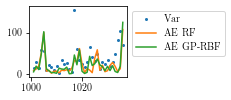

In [482]:
i = 60
latexify(3.32, 1.5)
# plt.figure(figsize=(15,4))
var = var_df.T.sort_index().T.iloc[i].values
err = np.abs(res['gp_rbf_gpy'].T.sort_index().T.iloc[i].values-res_gt.T.sort_index().T.iloc[i].values)
errf = np.abs(res['rf'].T.sort_index().T.iloc[i].values-res_gt.T.sort_index().T.iloc[i].values)
plt.plot(range(1001,1037), var, 'o', label='Var', markersize=2);
plt.plot(range(1001,1037), errf, label='AE RF');
plt.plot(range(1001,1037), err, label='AE GP-RBF');
plt.legend(bbox_to_anchor=(1,1));
plt.tight_layout();

### Plot station wise errors

 /home/patel_zeel/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


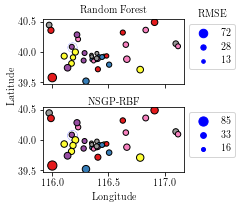

In [180]:
latexify(3.32, 3)
fig, ax = plt.subplots(2,1,sharex=True)
diff_s = np.sqrt(np.square(res['rf']-res_gt).mean())
diff_df = pd.DataFrame(index=diff_s.index)
diff_df['RMSE'] = diff_s
diff_df['fold'] = sorted([0,1,2,3,4,5]*6)
ax[0].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].max(), label=np.int(diff_df['RMSE'].max()), c='b')
ax[0].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].mean(), label=np.int(diff_df['RMSE'].mean()), c='b')
ax[0].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].min(), label=np.int(diff_df['RMSE'].min()), c='b')
ax[0].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].max(), c='w')
ax[0].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].min(), c='w')
ax[0].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].mean(), c='w')
ax[0].scatter(all_locs[:,0], all_locs[:,1], s=diff_df['RMSE'].sort_index(), 
              c=diff_df['fold'].sort_index(), edgecolors='k', cmap='Set1');
# ax[0].set_ylabel('Latitude');
ax[0].set_title('Random Forest');
ax[0].legend(bbox_to_anchor=(1,1))

diff_s = np.sqrt(np.square(res['nsgp_rbf']-res_gt).mean())
diff_df = pd.DataFrame(index=diff_s.index)
diff_df['RMSE'] = diff_s
diff_df['fold'] = sorted([0,1,2,3,4,5]*6)
ax[1].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].max(), label=np.int(diff_df['RMSE'].max()), c='b')
ax[1].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].mean(), label=np.int(diff_df['RMSE'].mean()), c='b')
ax[1].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].min(), label=np.int(diff_df['RMSE'].min()), c='b')
ax[1].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].max(), c='w')
ax[1].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].min(), c='w')
ax[1].scatter(all_locs[0,0], all_locs[0,1], s=diff_df['RMSE'].mean(), c='w')
ax[1].scatter(all_locs[:,0], all_locs[:,1], s=diff_df['RMSE'].sort_index(), 
            c=diff_df['fold'].sort_index(), edgecolors='k', cmap='Set1');
ax[1].set_xlabel('Longitude');fig.text(0,0.5,'Latitude',rotation=90);
ax[1].set_title('NSGP-RBF', pad=-0.1)
ax[1].legend(bbox_to_anchor=(1,1));
fig.text(0.8,0.9,'RMSE');
fig.tight_layout();
fig.savefig('../production/pm25_beijing_best36/linear/imgs/srmse.pdf')

### Average Feature importance

In [441]:
def load_models(model_name): # n_test = number of test stations
    pred_df = pd.DataFrame(columns=test_stations)
    for fold_id, fold in enumerate(folds):
        for file_id, file in enumerate(f_ids):
            try:
                val = pd.read_pickle(path+d_name+'/results/'+model_name+'/fold_'+fold+'/'+file+'.model')
            except Exception as e:
                val = np.nan
                print(model_name,fold_id,file,'not found')
            pred_df.loc[file_id, test_stations[fold_id*len(folds):(fold_id+1)*len(folds)]] = val
    return pred_df

In [442]:
rf_models = load_models('rf')

In [443]:
imp_df = pd.DataFrame(index=['Lon', 'Lat', 'T', 'P', 'H', 'W', 
                               'C', 'S', 'O', 'F'])
imps = []
for model in rf_models.iloc[:,[0,6,12,18,24,30]].values.ravel():
    imps.append(model.best_estimator_.feature_importances_)

 /home/patel_zeel/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


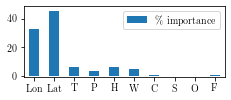

In [444]:
imp_df['\% importance'] = np.array(imps).mean(axis=0).round(3)*100
latexify(3.32, 1.5)
fig, ax = plt.subplots()

imp_df.index = imp_df.index.str.replace('_','\_')
imp_df.plot(ax=ax, kind='bar');
ax.set_xticklabels(imp_df.index, rotation = 0)
ax.set_ylim(-1, 49)
# fig.tight_layout();
plt.tight_layout();
fig.savefig('../production/pm25_beijing_best36/linear/imgs/rf_fi.pdf')

### Average feature importance in GP

In [445]:
gp_models = load_models('gp_rbf_gpy')

In [446]:
imp_df = pd.DataFrame(index=['Lon', 'Lat', 'T', 'P', 'H', 'W'])
imps = []
for model in gp_models.iloc[:,[0,6,12,18,24,30]].values.ravel():
    imps.append(model.kern.lengthscale)

 /home/patel_zeel/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


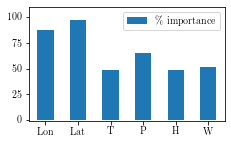

In [447]:
val = (1-((np.array(imps)>20)).sum(axis=0)/len(imps))[:6]
imp_df['\% importance'] = val*100
latexify(3.32, 2.1)
fig, ax = plt.subplots()

imp_df.index = imp_df.index.str.replace('_','\_')
imp_df.plot(ax=ax, kind='bar');
ax.set_xticklabels(imp_df.index, rotation = 0)
ax.set_ylim(-1, 110)
# fig.tight_layout();
plt.tight_layout();
fig.savefig('../production/pm25_beijing_best36/linear/imgs/gp_fi.pdf')

In [448]:
np.array(imps).shape

(1662, 10)

In [458]:
import seaborn as sns

In [477]:
vdf = pd.DataFrame(np.log(np.array(imps)[:,:6]).ravel(), columns=['V'])
vdf['F'] = ['Lon', 'Lat', 'T', 'P', 'H', 'W']*(vdf.shape[0]//6)
vdf

,V,F
0,0.882203,Lon
1,1.147183,Lat
2,8.619261,T
3,4.402093,P
4,-1.457547,H
...,...,...
9967,0.639320,Lat
9968,7.764137,T
9969,-1.202528,P
9970,7.854804,H


Index(['Lon', 'Lat', 'T', 'P', 'H', 'W'], dtype='object')


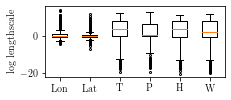

In [556]:
latexify(3.32, 1.5)
# sns.violinplot(x='F', y='V', data=vdf)
plt.boxplot(np.log(np.array(imps)[:,:6]), flierprops=dict(markersize=2));
print(imp_df.index[:6])
plt.xticks(ticks=[1,2,3,4,5,6], labels=imp_df.index[:6], rotation=0);
plt.ylabel('$\log$ lengthscale');
plt.tight_layout()
plt.savefig('../production/pm25_beijing_best36/linear/imgs/gp_fi.pdf')

### Latent lengthscales

In [202]:
nsgp_models = load_models('nsgp_rbf')

nsgp_rbf 1 00170 not found
nsgp_rbf 3 00001 not found
nsgp_rbf 5 00021 not found
nsgp_rbf 5 00159 not found
nsgp_rbf 5 00168 not found


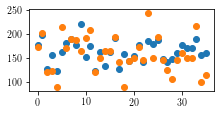

In [203]:
plt.scatter(range(len(res_gt.iloc[0])), res['nsgp_rbf'].iloc[0])
plt.scatter(range(len(res_gt.iloc[0])), res_gt.iloc[0])

In [78]:
from NSGPy.NumPy import LLS

In [205]:
X = np.load('../production/pm25_beijing_best36/linear/data10/fold_0/train/X/00000.npz')['arr_0']
# y = np.load('../production/pm25_beijing_best36/linear/data10/fold_0/train/y/00001.npz')['arr_0']
y = (np.sin(X[:,0])).reshape(-1, 1)

# X = np.linspace(-5,5,100).reshape(-1,1)
# y = np.sin(X)

test_m = LLS(X.shape[1], N_l_bar=5)
print(test_m.params, y.shape, y.mean())
test_m.fit(X, y-y.mean(), n_restarts=5)

{'GP_variance (sigma_f)': array([1.00488135]), 'GP_noise_level (sigma_n)': array([1.02151894]), 'Lengthscale_GP_variance (sigma_f_bar)': array([1.01027634, 1.00448832, 0.99236548, 1.01458941, 0.99375872,
       1.0391773 , 1.04636628, 0.98834415, 1.0291725 , 1.00288949]), 'Lengthscale_GP_lengthscale (sigma_l_bar)': array([1.00680446, 1.04255966, 0.95710361, 0.95871293, 0.95202184,
       1.03326198, 1.02781568, 1.03700121, 1.04786183, 1.02991586]), 'Lengthscale_GP_noise_level (sigma_n_bar)': array([0.99614794, 1.02805292, 0.96182744, 1.0139921 , 0.96433533,
       1.04446689, 1.00218483, 0.99146619, 0.97645556, 1.02742337]), 'learnt_lengthscales (l_bar)': array([[0.99561503, 1.00684339, 0.95187898, 1.01176355, 1.01120957,
        1.0116934 , 1.04437481, 1.01818203, 0.98595079, 0.9937032 ],
       [1.01976312, 0.95602255, 1.01667667, 1.01706379, 0.97103826,
        0.96289263, 0.98154284, 0.98637108, 1.00701968, 0.99386015],
       [1.04883738, 0.96020448, 0.97088768, 0.96613095, 1.0153

 /home/patel_zeel/anaconda3/lib/python3.8/site-packages/NSGPy-0.1.0-py3.8.egg/NSGPy/NumPy/latent_lengthscale_model/latent_lengthscale_model.py:202: RuntimeWarning:overflow encountered in square
 /home/patel_zeel/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:51: RuntimeWarning:overflow encountered in reduce
 /home/patel_zeel/anaconda3/lib/python3.8/site-packages/NSGPy-0.1.0-py3.8.egg/NSGPy/NumPy/latent_lengthscale_model/latent_lengthscale_model.py:216: RuntimeWarning:overflow encountered in matmul
 /home/patel_zeel/anaconda3/lib/python3.8/site-packages/NSGPy-0.1.0-py3.8.egg/NSGPy/NumPy/latent_lengthscale_model/latent_lengthscale_model.py:219: RuntimeWarning:invalid value encountered in true_divide


{'likelihood (mll)': -132.78164922901723,
 'GP_variance (sigma_f)': array([1.81405209]),
 'GP_noise_level (sigma_n)': array([1.e-05]),
 'L_GP_variance (sigma_f_bar)': array([0.95299875, 0.91094953]),
 'L_GP_lengthscale (sigma_l_bar)': array([3.76427627, 4.50161036]),
 'L_GP_noise_level (sigma_n_bar)': array([1.22707896, 0.93959704]),
 'N_lengthscales (l_bar)': array([[2.10150456, 6.75169109],
        [5.12455676, 6.5122877 ],
        [2.60200909, 4.64484339],
        [2.31102387, 3.14588361],
        [1.57479687, 2.82464471]])}

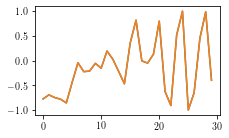

In [82]:
# tX = np.load('../production/pm25_beijing_best36/linear/data10/fold_0/test/X/00000.npz')['arr_0']
# ty = np.load('../production/pm25_beijing_best36/linear/data10/fold_0/test/y/00000.npz')['arr_0']
# scaler = pd.read_pickle('../production/pm25_beijing_best36/linear/data10/fold_0/scaler/00000.pickle')

plt.plot(y)
plt.plot(test_m.predict(X[:,:2])[0] + y.mean())
test_m.params

In [151]:
nsgp_var = load_variance('nsgp_rbf')

nsgp_rbf 1 00170 not found
nsgp_rbf 3 00001 not found
nsgp_rbf 5 00021 not found
nsgp_rbf 5 00159 not found
nsgp_rbf 5 00168 not found


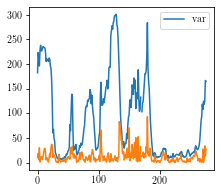

In [167]:
plt.plot(nsgp_var.iloc[:,6], label='var')
plt.plot(np.abs(res['nsgp_rbf'].iloc[:,6]-res_gt.iloc[:,6]))
plt.legend();